This code aims to download the following data series:
1. US Real GDP (quarterly)
2. US Industrial production index (monthly)
3. US leading indictors (monthly)

from the St. Louis Fred database using the FRED API.

In [1]:
#Install FRED API
!pip install fredapi

In [2]:
import fredapi as fa
import pandas as pd

In [31]:
import pandas as pd
from config import fred as settings
fred = fa.Fred(settings['api_key'])
import datetime
from datetime import timedelta
%matplotlib inline

In [34]:
#list of quarterly and monthly series
q_series = [('gdp','GDPC1')]
m_series = [('lei','USALOLITONOSTSAM'),('ip','INDPRO')]
all_series = [item for sublist in [q_series, m_series] for item in sublist]

Get the starting and end date of series

In [35]:
date_df =[]

for varname, var in all_series:
    x= fred.search(var).observation_start
    x= x[var].strftime("%Y-%m-%d")
    y= fred.search(var).observation_end
    y= y[var].strftime("%Y-%m-%d")
    #list=[varname,x,y]
    #date_df.append(list)
    date_df.append({'Variable': varname, 'Start': x, 'End': y})


date_df = pd.DataFrame(date_df)
date_df.sort_values(by='Start')

,Variable,Start,End
2,ip,1919-01-01,2023-08-01
0,gdp,1947-01-01,2023-04-01
1,lei,1960-01-01,2023-09-01


Get all the quarterly series

In [15]:
from datetime import timedelta
q_df =[]

for varname, var in q_series:
    x = fred.get_series(var)
    x.name = varname
    x = pd.DataFrame(x)
    q_df.append(x)

q_df = pd.concat(q_df, axis=1)
#change the index from start to end of quarter date
q_df.index = q_df.index.to_period('Q').to_timestamp('Q')
q_df.index = pd.to_datetime(q_df.index)

# Calculate the YoY growth rate for each variable
q_df_yoy = q_df.pct_change(periods=4)  # Assuming quarterly data, so 4 periods in a year

q_df_yoy = q_df_yoy.reset_index().rename(columns={'index': 'date'})


In [16]:
q_df_yoy.tail(20)

,date,gdp
286,2018-09-30,0.031300
287,2018-12-31,0.021251
288,2019-03-31,0.018513
289,2019-06-30,0.021541
290,2019-09-30,0.026703
291,2019-12-31,0.031826
292,2020-03-31,0.012266
293,2020-06-30,-0.075285
294,2020-09-30,-0.014689
295,2020-12-31,-0.010833


Get all the monthly series

In [36]:
m_df =[]

for varname, var in m_series:
    x = fred.get_series(var)
    x.name = varname
    x = pd.DataFrame(x)
    m_df.append(x)

m_df = pd.concat(m_df, axis=1)
m_df = m_df.resample('M').last()

# Calculate the YoY growth rate for each variable
m_df_yoy = m_df.pct_change(periods=12)

m_df_yoy = m_df_yoy.reset_index().rename(columns={'index': 'date'})


In [42]:
m_df_yoy.tail(400)

,date,lei,ip
857,1990-06-30,-0.004606,0.017224
858,1990-07-31,-0.007492,0.025400
859,1990-08-31,-0.011521,0.019146
860,1990-09-30,-0.015895,0.022967
861,1990-10-31,-0.019792,0.017839
...,...,...,...
1252,2023-05-31,-0.009793,0.000092
1253,2023-06-30,-0.006135,-0.003107
1254,2023-07-31,-0.002790,-0.000396
1255,2023-08-31,0.000021,0.002462


Combine the series

In [44]:
df = pd.merge(m_df_yoy, q_df_yoy, on='date', how='left')
df.set_index('date', inplace=True)


Plot the series

<Axes: xlabel='date'>

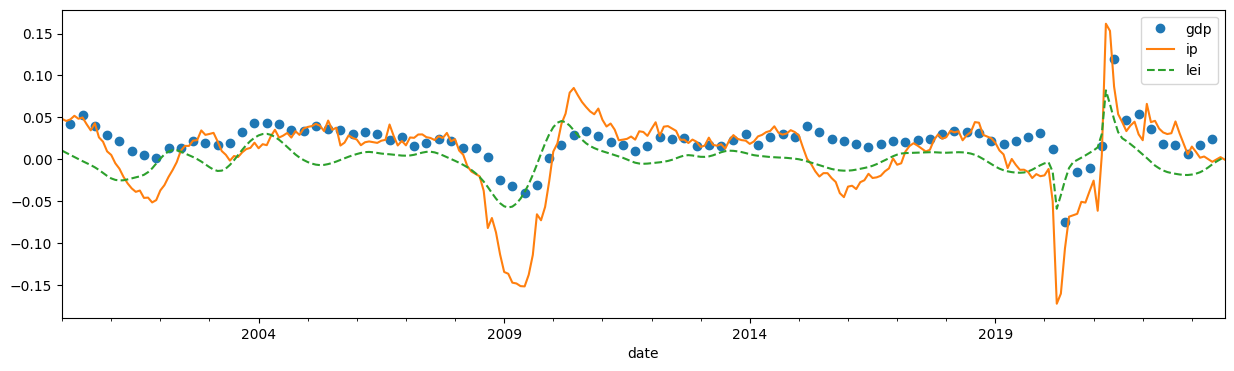

In [47]:
df[['gdp','ip','lei']].loc['2000-1-31':].plot(figsize=(15,4), style=['o','-','--'])


In [48]:
df.to_csv('data.csv', index=True)